In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from geopy.distance import geodesic as GD
from collections import Counter
import math
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.path as mpath
from scipy.stats import gaussian_kde
from matplotlib import cm
import pandas as pd
import matplotlib as mpl
from datetime import datetime, timedelta
import xarray as xr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
import random
from matplotlib.patches import Rectangle
from scipy.stats import ttest_ind
from plotnine import *
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
data_address = '../../data/RAW_DATA/M2I3NXGAS_AOD_remove_leapyear.h5'

f = h5py.File(data_address,'r')
data = f['Global'][:]
lat = f['lat'][:]
lon = f['lon'][:]
f.close()

Network1_data = data
Network2_data = data[0:21,:,:,:]
Network3_data = data[21:43,:,:,:]

Network1_event_threshold = np.zeros((len(lat),len(lon)))
Network2_event_threshold = np.zeros((len(lat),len(lon)))
Network3_event_threshold = np.zeros((len(lat),len(lon)))

for i in range(len(lat)):
    for j in range(len(lon)):
        Network1_event_threshold[i,j] = np.percentile(np.reshape(Network1_data[...,i,j],-1),90)
        Network2_event_threshold[i,j] = np.percentile(np.reshape(Network2_data[...,i,j],-1),90)
        Network3_event_threshold[i,j] = np.percentile(np.reshape(Network3_data[...,i,j],-1),90)

C:\Users\34322\AppData\Local\Temp\ipykernel_30520\2936155522.py:15: UserWarning: Rasterization of '<cartopy.mpl.contour.GeoContourSet object at 0x000002D4FC610290>' will be ignored


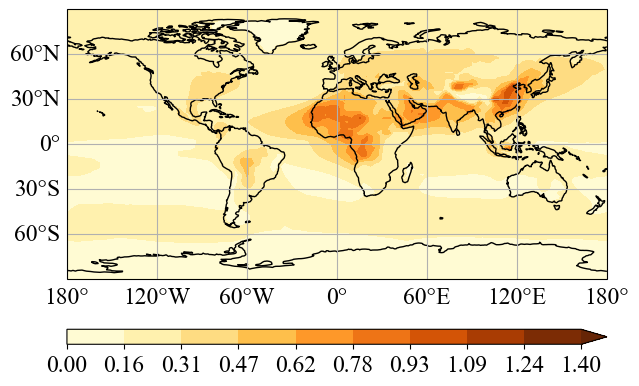

In [4]:
cyclic_data,cyclic_lon = add_cyclic_point(Network1_event_threshold,coord = lon)
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection = ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
gl = ax1.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 17}
gl.ylabel_style = {'size': 17}
c1 = ax1.contourf(cyclic_lon,lat,cyclic_data,cmap=cm.YlOrBr, levels = np.linspace(0,1.4,10),extend = 'max',transform = ccrs.PlateCarree())
colorbar = fig.add_axes([0.1,0.15,0.9,0.03])
cbar = fig.colorbar(c1,cax=colorbar,orientation='horizontal',format = '%.2f') 
cbar.ax.tick_params(labelsize=17)
c1.set_rasterized(True)

plt.savefig("FIG/FIGS1/FIGS1a.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

In [10]:
#data_address = '../../data/Network1/EvSy_real.h5'
data_address = '../../data/Network2/EvSy_real_same.h5'  #21
#data_address = '../../data/Network3/EvSy_real_same.h5'  #22

f = h5py.File(data_address,'r')
events = f['events'][:]
lat = f['lat'][:]
lon = f['lon'][:]
f.close()

C:\Users\34322\AppData\Local\Temp\ipykernel_30520\3873711356.py:15: UserWarning: Rasterization of '<cartopy.mpl.contour.GeoContourSet object at 0x000002D4801C0590>' will be ignored


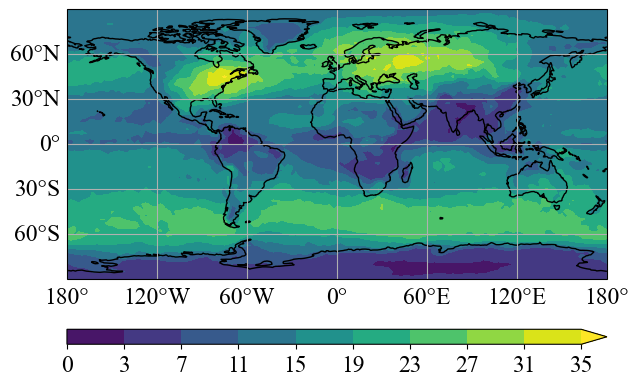

In [11]:
plt.rcParams['font.family'] = 'Times New Roman'
cyclic_data,cyclic_lon = add_cyclic_point(events,coord=lon)
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection = ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
gl = ax1.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 17}
gl.ylabel_style = {'size': 17}
c1 = ax1.contourf(cyclic_lon,lat,cyclic_data/21,cmap=cm.viridis,levels =np.linspace(0,35,10),extend = 'max',transform = ccrs.PlateCarree())
colorbar = fig.add_axes([0.1,0.15,0.9,0.03])
cbar = fig.colorbar(c1,cax=colorbar,orientation='horizontal',format = '%d') 
cbar.ax.tick_params(labelsize=17)
c1.set_rasterized(True)
plt.savefig("FIG/FIGS1/FIGS1c.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()
#fig.savefig('../image/figS1d.svg',dpi = 750,bbox_inches='tight') 